# Brownian Motion

Brownian motion is usually used to refer to the random jiggling of pollen grains in water. However, any molecule inside water undergoes this jiggling as a result of random bombardments by other molecules but due to color differences this is noticable only for pollen grains. In this section we use stochastic calculus to model Brownian motion. We do this by attributing the change in the velocity to a drag force opposed to the velocity and a random force modelled by the Wiener process. This system is analytically solvable and we do so. We then integrate the velocity to find the position of the particle. At late times the position displays the classic $x_t \sim \sqrt{t}$ behavior of random walk. We then proceed to solve the system by Monte Carlo and demonstrate that this is consistent with the analytical method.

I have chosen to keep the steps in the derivations explicit for eager students to be able to reproduce. However, for those interested only in the final results and to assist the reader in not getting lost in the details, I have color coded the essential equations and results.

## Velocity

The change in velocity process involves a deterministic drag piece and a stochastic force piece modelled by the Wiener process. In a different reincarnation (devoid of Stochastic calculus notation) this is known as the [Langevin equation](https://en.wikipedia.org/wiki/Langevin_equation). The process is described by the SDE

$$ 
\newcommand{\mean}[1]{\langle #1 \rangle}
\newcommand{\f}[2]{\frac{#1}{#2}}
\color{red}{dV(t) = - \gamma V(t) dt + \beta dW_t}~.$$

Using standard techniques this can be solved to give

$$ V(t)  = v_0 e^{-\gamma t} + \beta e^{-\gamma t} \int_0^t e^{\gamma t'} dW_{t'}$$ 

as can be verified by direct substitution. 

However this form is not particularly illuminating. Instead we observe that at every instant we add an independent normally distributed increment to the velocity and thus, by the stability of normal distribution under convolution, the velocity at any time will be given by a normal distribution. Since the normal distribution is completely determinded by its first two moments, we only need to evaluate those. Since the notation of differential element in Stochastic calculus is different from that in deterministic calculus, I will be very explicit in the following. We begin by being very clear what the LHS of the SDE above means. It means

$$ \begin{eqnarray}
dV(t):= V(t+dt) - V(t)
\end{eqnarray}
$$

where $V(t)$ and $V(t+dt)$ are stochastic variables (and in particular are normally distributed as we established above). We can take the expectation value on both sides to get

$$ \begin{eqnarray}
\mean{ d V(t)} &=& \mean{V(t+dt)} - \mean{V(t)} := d \mean{V(t)} \\
&=& -\gamma \mean{V(t)}
\end{eqnarray}
$$


Notice how in the first line the 'd' came out of the mean. This needs to be clearly understood as it is a potential source of confusion. In fact, if one wants to be careful one should use different symbols for stochastic differential elements and ordinary ones. The 'd' on the RHS of the first line is the usual differential element from ordinary deterministic calculus and we then have an ODE for the mean

$$ \begin{eqnarray}
d \mean{V(t)} &=& - \gamma \mean{V(t)} dt~,
\end{eqnarray}
$$

with the solution

$$ \mean{V(t)} = v_0 e^{-\gamma t} ~.$$

Now we look for the variance. We use similar techniques as above to get

$$
\begin{eqnarray}
d(V^2(t)) &:=& V^2(t+dt) - V^2(t)~,\\
&=& 2 V(t) dV(t) + {dV(t)}^2 ~, \\
&=& (-2 \gamma V^2(t) + \beta^2) dt + 2 V(t) \beta dW_t ~.
\end{eqnarray}
$$

which can also be obtained by application of Ito's rule to $V^2$. Taking the mean of both sides

$$\begin{eqnarray}
\mean{d V^2(t)} &=& \mean{V^2(t+dt)} - \mean{V^2(t)} := d \mean{V^2(t)} \\
&=& (\beta^2-2 \gamma \mean{V^2(t)}) dt ~.
\end{eqnarray}
$$

which gives us an ODE. The solution to this ODE consistent with the initial condition $V(0)=v_0$ is

$$
\mean{V^2(t)}= v_0^2 e^{-2 \gamma t} +  \f{\beta^2}{2 \gamma} (1- e^{-2 \gamma t}) ~.
$$

Therefore we get

$$
var(V(t))=\f{\beta^2}{2 \gamma} (1- e^{-2 \gamma t})~.
$$

This finally gives

$$
\color{blue}{V(t) = \mathcal N \Big( v_0 e^{-\gamma t}, \sqrt{ \f{\beta^2}{2 \gamma} (1- e^{-2 \gamma t})}\Big)}
$$


** Interpretation **

We see that at late times $ t \gamma \gg 1$, we get $V(t) = \mathcal N \Big( 0, \f{\beta}{\sqrt{2 \gamma}}\Big)$. Thus the mean velocity goes to zero but there are fluctuations. In the context of physics these fluctuations have to be such that the average energy is $\f{1}{2} k T$ where $k$ is the Boltzmann constant and $T$ is the tempreature. Thus we get
$$
\f{1}{2} M \f{\beta^2}{2 \gamma} = \f{1}{2} k T~,
$$
giving 
$$
\beta =\sqrt{\f{2 \gamma k T}{M}}~.
$$

In other words the strength of the stochastic kicks on the particle is phenominologically fixed from the drag force, the temperature and the mass of the particle to be consistent with the equipartition of energy (which basically comes from the second law of thermodynamics which in turn is a fancy way of saying that the system is typically found to be in a state that is most likely).

## Position

The SDE for position is given by

$$
\color{red}{dX(t)= V(t) dt}~,
$$

which should be interpreted as the difference of two stochastic variables 

$$
dX(t) := X(t+dt) - X(t)
$$

As before (remember how we defined terms like $dV^2(t)$ and how we took the averages to get ODEs)

$$
\begin{eqnarray}
dX^2(t)&=&2 X(t) dX(t) + d X(t)^2~, \\
&=& 2 X(t) V(t) dt~,
\end{eqnarray}
$$

and

$$
\begin{eqnarray}
d(XV(t)) &=& V(t) dX(t) + X(t) dV(t) + dX(t) dV(t) ~,\\
&=& (V^2(t) - X(t) V(t))dt + \beta X(t) dW_t~.
\end{eqnarray}
$$

Taking the expectation values of these we get the ODEs

$$ 
\begin{eqnarray}
d\mean{X(t)} &=& \mean{V(t)} dt = v_0 e^{-\gamma t} ~,\\
d\mean{X^2(t)} &=& 2 \mean{X(t) V(t)} dt ~,  \\
d \mean{XV(t)} &=& - \gamma \mean{XV(t)} dt + \mean{V^2(t)} dt ~.
\end{eqnarray}
$$

The first can be solved to give

$$
\mean{X(t)} = x_0 + \f{v_0}{\gamma} (1- e^{-\gamma t})~.
$$

We massage the others to get

$$
\begin{eqnarray}
\f{d var(X(t))}{dt} &=&  \f{d \mean{X^2(t)}}{dt}  - 2 \mean{X(t)} \f{d \mean{X(t)}}{dt}~, \\
&=& 2 cov(X(t), V(t))~.
\end{eqnarray}$$

and

$$
\begin{eqnarray}
\f{d cov(X(t),V(t))}{dt} &=&  \f{d \mean{X(t) V(t)}}{dt}  -  \mean{X(t)} \f{d \mean{V(t)}}{dt}-\mean{V(t)} \f{d \mean{X(t)}}{dt} ~,\\
&=& \mean{V^2(t)} - \gamma \mean{X(t) V(t)}+ \gamma \mean{X(t)} \mean{V(t)} -\mean{V(t)}^2 ~, \\
&=& var(V(t)) - \gamma cov(X(t),V(t))~.
\end{eqnarray}$$

Therefore we get

$$
cov(X(t) V(t)) = \f{\beta^2}{2 \gamma^2}(1- 2 e^{-\gamma t}+ e^{-2 \gamma t})~,
$$

and 

$$
var(X(t)) = \f{\beta^2}{\gamma^2} \left[ t - \f{2}{\gamma}(1- e^{-\gamma t}) + \f{1}{2 \gamma} (1- e^{-2 \gamma t}) \right]~.
$$

Now comes the crucial point. Look back at the SDE for $X(t)$. At each instant the increment in $X(t)$ is given by normal distributions (as $V(t)$ is normally distributed) but the increments are **not** independent. However sums of normally distributed random numbers are normally distributed even if they are not independent. The two variable case shows this easily. Non independent random numbers can be written as $\sigma_x Z_1$ and $\sigma_y( \cos \theta Z_2 + \sin \theta Z_1)$ where $Z_1,Z_2$ are independent $\mathcal N(0,1)$. The variances are $\sigma_x^2, \sigma_y^2$ and the correlation is $\sin \theta$. We can then clearly see that sum can be written as sum of independent normals and is thus a normal itself.

Thus we get the distribution of $X(t)$ as

$$
\color{blue}{X(t) =  \mathcal N \Big( x_0 + \f{v_0}{\gamma} (1- e^{-\gamma t}),  \f{\beta}{\gamma} \sqrt{  t - \f{2}{\gamma}(1- e^{-\gamma t}) + \f{1}{2 \gamma} (1- e^{-2 \gamma t})}\Big)}
$$

Note given that $V(t)$ and $X(t)$ are normal distributions and have a correlation, they are jointly normally distributed and the reader can write down the probability distribution for them quite simply.

** Interpretation **

We see that at late times the mean position goes to $x_0 + v_0 \gamma^{-1}$ and the variance is given by $\beta^2 \gamma^{-2} t$. With the interpretation of $\beta$ given above the variance is $\f{2 kT}{\gamma M} t$. We see that the fluctuations are inversely proportional to mass and drag and directly proportional to temperature which makes sense. Also note that early time behavior is different form the linear scaling of variance with time that is a characteristic of random walk. In fact the variance at early times ($t \gamma \ll 1$) grows as $\propto t^3$.

** Smoluchowski Approximation **

There is a nice way to get the late time behavior directly. At late times the distribution becomes stationary for the velocity and this happens when all the inertial effects are gone and only random ones remain. We do this by setting $dV=0$, solving for $V(t) dt$ and plugging this in $dX= V(t) dt$ to get

$$
dX = \f{\beta}{\gamma} dW_t
$$

that solves to $X(t) = \mathcal N(x_0', \f{\beta}{\gamma} \sqrt{t})$ where $x_0'$ is the value of $X(t)$ when the Smouluchowski approximation kicks in.

## A caveat: auto-correlation

There is a danger when describe the position and velocity process as normal distributions to forget that the process has correlations are different times. For instance it would be silly to simulate the process by drawing from independent normals at different times. It is only the increments $dV$ that are independent at different times. To show this we calculate the auto-correlation.

### Velocity

For this part we write down the formal solution from above again

$$
V(t) = v_0 e^{-\gamma t} + \beta e^{-\gamma t} \int_0^t e^{\gamma t'} dW_{t'}
$$

Then the covariance of velocity at different times is
$$
\begin{eqnarray}
cov(V(t),V(s)) &=& \langle (V(t) - \langle V(t) \rangle) (V(s) - \langle V(s) \rangle) \rangle \\
&=& \beta^2 e^{-\gamma (t+s)} \int_0^t \int_0^s e^{\gamma (t' + s')} \langle dW_{t'} dW_{s'} \rangle
\end{eqnarray}
$$

Recall that for the part of the path thats common to the two integrals the two Weiner differential elements are the same so we get $dt$ and for the rest there is only one Wiener differential element so the expectation value gives zero. Thus we have

$$
\begin{eqnarray}
cov(V(t),V(s)) &=& \frac{\beta^2}{2\gamma} e^{-\gamma (t+s)}  (e^{2 \gamma min(t,s))}-1) \\
&=&\frac{\beta^2}{2\gamma} ( e^{ - \gamma |t-s|} - e^{-\gamma (t+s)} )
\end{eqnarray}
$$

Thus, in particular, in the stationary limit, when $t,s \to \infty$ the auto-correlation function becomes

$$
\begin{eqnarray}
cov(V(t),V(s)) &=& \frac{\beta^2}{2\gamma} e^{ - \gamma |t-s|}
\end{eqnarray}
$$

Thus we see autocorrelations get 'knocked out' when the time separation is large compare to the damping coefficient.


## Plots of Analytical Expressions

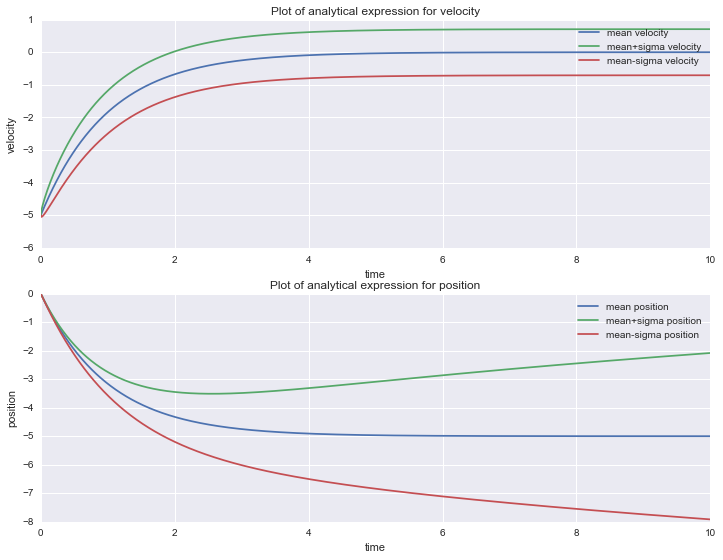

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
from IPython.core.pylabtools import figsize
figsize(12, 9)


# Parameters
beta=1.0
gamma=1.0

# Initial values
v0=-5.0
x0=0.0

# time-line
t=np.linspace(0,10,1000)

# velocity process
plt.subplot(211)

vmean=v0*np.exp(-gamma*t)
std_vel=np.sqrt((beta**2/(2 * gamma))* (1- np.exp(-2*gamma*t)))
vup=vmean+std_vel
vdown=vmean-std_vel

plt.plot(t,vmean,label="mean velocity")
plt.plot(t,vup,label="mean+sigma velocity")
plt.plot(t,vdown,label="mean-sigma velocity")
plt.xlabel("time")
plt.ylabel("velocity")
plt.title("Plot of analytical expression for velocity")
plt.legend()

# position process
plt.subplot(212)

xmean=x0+v0/gamma*(1- np.exp(-gamma*t))
std_pos=np.sqrt((beta/gamma)**2*(t-2/gamma*(1-np.exp(-gamma*t))+1/(2*gamma)*(1-np.exp(-2*gamma*t))))
xup=xmean+std_pos
xdown=xmean-std_pos

plt.plot(t,xmean,label="mean position")
plt.plot(t,xup,label="mean+sigma position")
plt.plot(t,xdown,label="mean-sigma position")
plt.xlabel("time")
plt.ylabel("position")
plt.title("Plot of analytical expression for position")
plt.legend()

## Monte Carlo Simulations

In [5]:
class OrnsteinUhlenbeckPaths(object):
    
    
    def __init__(self,x0,v0,beta,gamma,T,nsteps,npaths):
        
        # giving initial values of position and velocity, give beta and gamma as defined above, the total time 
        # for simulation and number of steps. Finally give the number of paths to simulate
        
        self.x0=x0
        self.v0=v0
        self.beta=beta
        self.gamma=gamma
        self.T=T
        self.nsteps=nsteps
        self.npaths=npaths
        
        # define the element dt
        self.dt=1.0*T/nsteps
        
        # define the time-line
        self.time=np.linspace(0,self.T,self.nsteps+1)
        
        # define dW
        self.dW=np.sqrt(self.dt)
        
        # generate the random normals required to evolve the path
        self.randoms=np.random.normal(0,1,npaths*nsteps)
        self.randoms.shape=[npaths,nsteps]
        
        # generate the np-array to hold the paths
        self.paths_X=np.zeros(shape=(npaths,nsteps+1))
        self.paths_V=np.zeros(shape=(npaths,nsteps+1))
        
        # fill in the starting value for all the paths
        self.paths_X[:,0]=self.x0
        self.paths_V[:,0]=self.v0
    
        # the SDE are
        # V_{t+1}=V_t - gamma V_t dt + beta dW
        # X_{t+1}=X_t + V_t dt
        
        for i in range(nsteps):
            self.paths_V[:,i+1]=self.paths_V[:,i]*(1.0-gamma*self.dt)+self.beta*self.dW*self.randoms[:,i]
            self.paths_X[:,i+1]=self.paths_X[:,i]+self.paths_V[:,i]*self.dt
        
    def get_paths_V(self):
        return self.paths_V
    
    def get_paths_X(self):
        return self.paths_X
    
    def get_timeline(self):
        return self.time
    

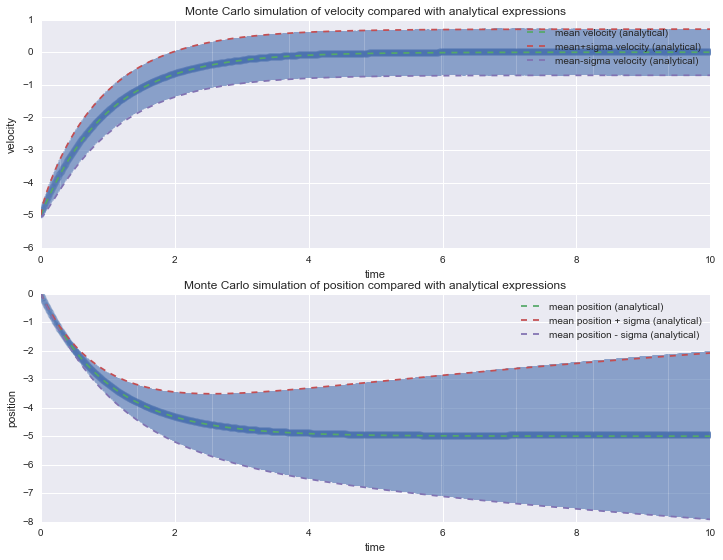

In [7]:
# Generate 10000 paths with time interval 10 divided into 1000 parts
paths=OrnsteinUhlenbeckPaths(x0,v0,beta,gamma,10,1000,10000)

# Get the mean and standard deviation of the velocity from the paths
v_mean=paths.get_paths_V().mean(0)
v_std=paths.get_paths_V().std(0)

# Get the mean and standard deviation of the position from the paths
x_mean=paths.get_paths_X().mean(0)
x_std=paths.get_paths_X().std(0)

# Get the timeline from the paths
t_paths=paths.get_timeline()

# plot the velocity process
plt.subplot(211)
# plot the mean with errorbars for each point on time-line
plt.errorbar(t_paths,v_mean,yerr=v_std,fmt='o',alpha=.3)
# plot the analytically generated results
plt.plot(t,vmean,"--",label="mean velocity (analytical)")
plt.plot(t,vup,"--",label="mean+sigma velocity (analytical)")
plt.plot(t,vdown,"--",label="mean-sigma velocity (analytical)")
plt.xlabel("time")
plt.ylabel("velocity")
plt.title("Monte Carlo simulation of velocity compared with analytical expressions")
plt.legend()

# plot the position process
plt.subplot(212)
# plot the mean with errorbars for each point on time-line
plt.errorbar(t_paths,x_mean,yerr=x_std,fmt='o',alpha=.3)
# plot the analytically generated results
plt.plot(t,xmean,"--",label="mean position (analytical)")
plt.plot(t,xup,"--",label="mean position + sigma (analytical)")
plt.plot(t,xdown,"--",label="mean position - sigma (analytical)")
plt.xlabel("time")
plt.ylabel("position")
plt.title("Monte Carlo simulation of position compared with analytical expressions")


plt.legend()

** A realization of the path is given below **

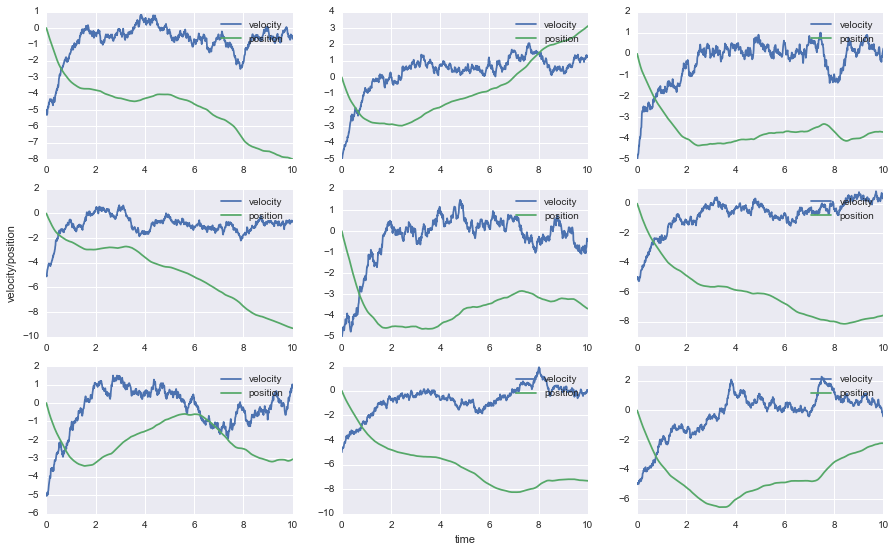

In [17]:
figsize(15,9)
number_columns=3
number_rows=3
for i,j in enumerate([(i/number_columns,i%number_columns) for i in range(number_columns*number_rows)]):
    plt.subplot2grid((number_rows,number_columns),j)
    plt.plot(t_paths,paths.get_paths_V()[i],label="velocity")
    plt.plot(t_paths,paths.get_paths_X()[i],label="position")
    if(j==(2,1)): plt.xlabel("time")
    if(j==(1,0)): plt.ylabel("velocity/position")
    plt.legend()
